
Question 2: Polynomial Regression <br>

Description:<br>
Perform polynomial regression to fit a non-linear dataset.

Mean Squared Error (Degree 3): 0.64


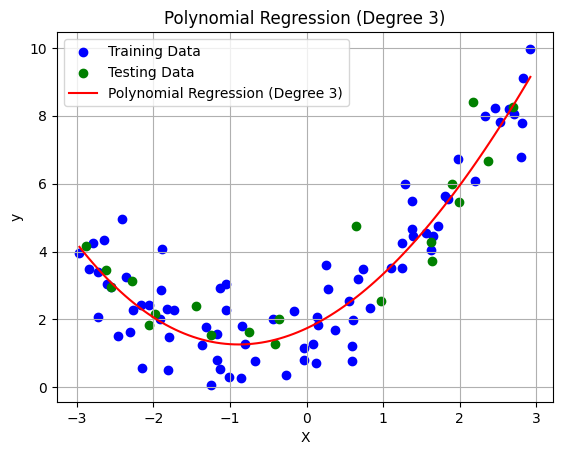

Polynomial Coefficients:
Intercept: 1.7371159757001893
Coefficient for x^1: 1.06
Coefficient for x^2: 0.57
Coefficient for x^3: -0.02
Predicted y for x = 2.5: 7.60


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some non-linear data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose the degree of the polynomial
degree = 3

# Create Polynomial Features
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the polynomial features
model.fit(X_poly_train, y_train)

# Make predictions on the test data
y_poly_pred = model.predict(X_poly_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_poly_pred)
print(f"Mean Squared Error (Degree {degree}): {mse:.2f}")

# Visualize the data and the polynomial regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')

# Generate points for plotting the regression curve
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_poly_plot = poly_features.transform(X_plot)
y_poly_plot = model.predict(X_poly_plot)
plt.plot(X_plot, y_poly_plot, color='red', label=f'Polynomial Regression (Degree {degree})')

plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients of the polynomial
print("Polynomial Coefficients:")
print("Intercept:", model.intercept_[0])
for i, coef in enumerate(model.coef_[0]):
    print(f"Coefficient for x^{i+1}: {coef:.2f}")

# Make a new prediction
new_x = np.array([[2.5]])
new_x_poly = poly_features.transform(new_x)
predicted_y = model.predict(new_x_poly)
print(f"Predicted y for x = {new_x[0][0]}: {predicted_y[0][0]:.2f}")